In [85]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

df = pd.read_csv("CYPsDB.csv")
df.columns


Index(['protein', 'name', 'reaction', 'rheaID', 'substrates',
       'Substrate CHEBI ID', 'Substrate SMILES', 'reducing_agent', 'cofactor',
       'products', 'Product CHEBI ID', 'Product SMILES', 'organism_name',
       'kingdom_name', 'superkingdom_name', 'sequence', 'length',
       'additional info'],
      dtype='object')

<Axes: xlabel='length', ylabel='Count'>

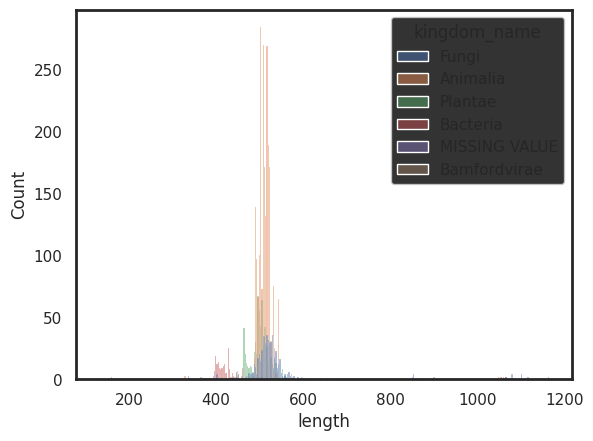

In [86]:
sns.histplot(data=df, x="length", hue="kingdom_name")

Text(0.5, 0.98, 'CYPs length distributions')

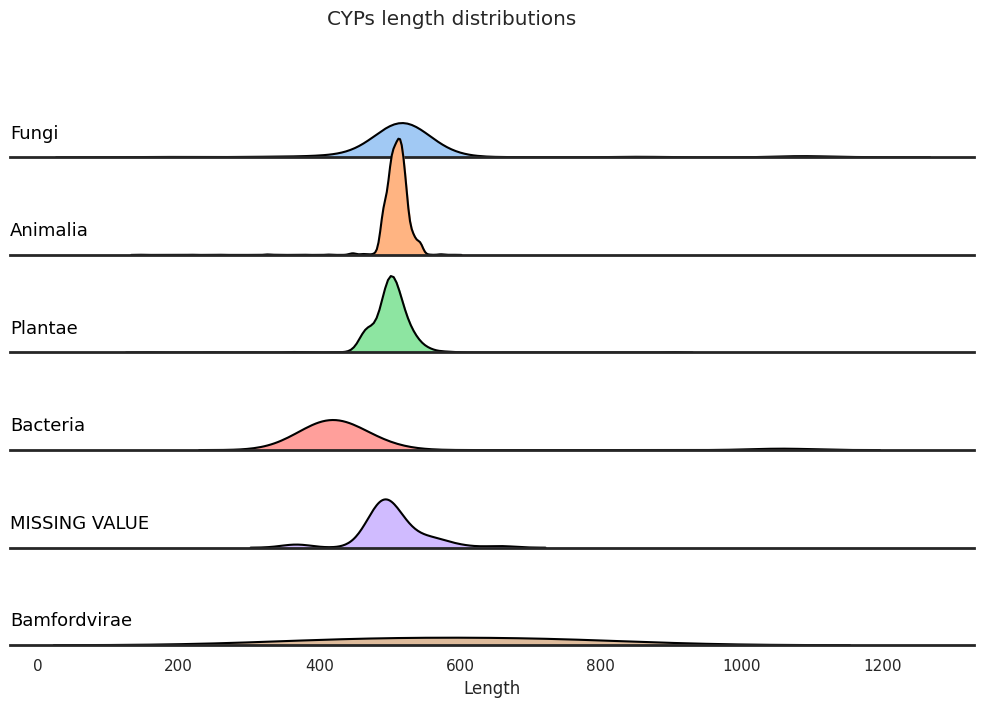

In [87]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("pastel", 12)
g = sns.FacetGrid(df, palette=palette, row="kingdom_name", hue="kingdom_name", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="length", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="length", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "length")
g.fig.subplots_adjust(hspace=-.2)
g.set_titles("")
g.set(yticks=[], xlabel="Length",ylabel=None)
g.despine( left=True)
plt.suptitle('CYPs length distributions', y=0.98)

We can see that there is a small number of CYPs about 1100 AA long. All the other ones are aproximately 500 AA long. We are going to take a look at the long ones to see if they are part of some gene cluster.

In [88]:
# filtering out the long CYPs from the database
longCYPs = df.loc[df['length'] > 1000]
longCYPs = longCYPs.drop('additional info', axis=1)
#longCYPs.shape

# there are only 27 CYPs longer than 1000 AA, 36 longer than 800 AA

# we can see the peaks with enzymes longer than 1000 in Fungi and Bacteria so we will see how many are there in these two together

longCYPsFungi = longCYPs.loc[longCYPs['kingdom_name'] == 'Fungi']
longCYPsFungi.shape 
# 19 long CYPs in Fungi

longCYPsBact = longCYPs.loc[longCYPs['kingdom_name'] == 'Bacteria']
longCYPsBact.shape 
# 8 long CYPs in Bacteria

# that's 27 together and that is the number we got overall so we'll now take a look at these in the Uniprot db to see their function


(8, 17)

In [89]:

# we also need to drop the duplicates first because some of these enzymes catalyze more reactions
longCYPsFungi.drop_duplicates('protein')


,protein,name,reaction,rheaID,substrates,Substrate CHEBI ID,Substrate SMILES,reducing_agent,cofactor,products,Product CHEBI ID,Product SMILES,organism_name,kingdom_name,superkingdom_name,sequence,length
74,G5EB19,Psi-producing oxygenase A,"(9Z,12Z)-octadecadienoate + O2 = (8R,9Z,12Z)-8...",25395,"(9Z,12Z)-octadecadienoate",30245,CCCCC\C=C/C\C=C/CCCCCCCC([O-])=O,NaN,heme,"(8R,9Z,12Z)-8-hydroperoxyoctadeca-9,12-dienoate",58659,CCCCC\C=C/C\C=C/[C@@H](CCCCCCC([O-])=O)OO,Emericella nidulans (strain FGSC A4 / ATCC 381...,Fungi,Eukaryota,MGEDKETNILAGLGNTISQVENVVAASLRPLPTATGDGTYVAESTQ...,1081
1541,Q4WPX2,Psi-producing oxygenase A,"(9Z,12Z)-octadecadienoate + O2 = (8R,9Z,12Z)-8...",25395,"(9Z,12Z)-octadecadienoate",30245,CCCCC\C=C/C\C=C/CCCCCCCC([O-])=O,NaN,heme,"(8R,9Z,12Z)-8-hydroperoxyoctadeca-9,12-dienoate",58659,CCCCC\C=C/C\C=C/[C@@H](CCCCCCC([O-])=O)OO,Neosartorya fumigata (strain ATCC MYA-4609 / A...,Fungi,Eukaryota,MSEKQTGSANGGLGKTLAQLEQVVSASLRPLPSQTGDGTYVTEQVK...,1079
1789,Q6RET3,Psi-producing oxygenase A,"(9Z,12Z)-octadecadienoate + O2 = (8R,9Z,12Z)-8...",25395,"(9Z,12Z)-octadecadienoate",30245,CCCCC\C=C/C\C=C/CCCCCCCC([O-])=O,NaN,heme,"(8R,9Z,12Z)-8-hydroperoxyoctadeca-9,12-dienoate",58659,CCCCC\C=C/C\C=C/[C@@H](CCCCCCC([O-])=O)OO,Emericella nidulans,Fungi,Eukaryota,MGEDKETNILAGLGNTISQVENVVAASLRPLPTATGDGTYVAESTQ...,1081
2064,Q9HGE0,Bifunctional cytochrome P450/NADPH--P450 reduc...,an organic molecule + O2 + reduced [NADPH--hem...,17149,an organic molecule,142491,*[H],reduced [NADPH--hemoprotein reductase],heme,an alcohol,30879,O[*],Gibberella moniliformis (strain M3125 / FGSC 7...,Fungi,Eukaryota,MSATALFTRRSVSTSNPELRPIPGPKPLPLLGNLFDFDFDNLTKSL...,1115
2126,Q9UUS2,Linoleate diol synthase,"(9Z,12Z)-octadecadienoate + O2 = (8R,9Z,12Z)-8...",25395,"(9Z,12Z)-octadecadienoate",30245,CCCCC\C=C/C\C=C/CCCCCCCC([O-])=O,NaN,heme,"(8R,9Z,12Z)-8-hydroperoxyoctadeca-9,12-dienoate",58659,CCCCC\C=C/C\C=C/[C@@H](CCCCCCC([O-])=O)OO,Gaeumannomyces graminis,Fungi,Eukaryota,MTVSTHHDDSPGLSGRLRDLLHHVFGNQKSPTVYPNAPGNSAKPVP...,1165
2163,Q9Y8G7,Bifunctional cytochrome P450/NADPH--P450 reduc...,an organic molecule + O2 + reduced [NADPH--hem...,17149,an organic molecule,142491,*[H],reduced [NADPH--hemoprotein reductase],heme,an alcohol,30879,O[*],Fusarium oxysporum,Fungi,Eukaryota,MAESVPIPEPPGYPLIGNLGEFTSNPLSDLNRLADTYGPIFRLRLG...,1066
2251,A0A3G9HRC2,Bifunctional cytochrome P450/NADPH--P450 reduc...,an organic molecule + O2 + reduced [NADPH--hem...,17149,an organic molecule,142491,*[H],reduced [NADPH--hemoprotein reductase],heme,an alcohol,30879,O[*],Alternaria alternata,Fungi,Eukaryota,MAISSPSQARSVGNPSPRCVKSSTYPFLGNILDIDPDNFTKSLGDV...,1103
2259,A0A455R5H4,Bifunctional cytochrome P450/NADPH--P450 reduc...,H(+) + ilicicolin A + NADPH + O2 = H2O + ilici...,63092,ilicicolin A,146154,C=1(C(=C(C(=C(C1Cl)C)C=O)O)C/C=C(/CC/C=C(/CCC=...,NADPH,heme,ilicicolin A epoxide,146155,C=1(C(=C(C(=C(C1Cl)C)C=O)O)C/C=C(/CC/C=C(/CC[C...,Acremonium egyptiacum,Fungi,Eukaryota,MTELIPGPKGLPLIGNVLDIDPVDAVVCLGRIADTYGHIYQLKVGG...,1064
2588,Q2UNA2,Bifunctional cytochrome P450/NADPH--P450 reduc...,NADPH + 2 oxidized [cytochrome P450] = H(+) + ...,24040,2 oxidized [cytochrome P450],55376,CC1=C(CCC([O-])=O)C2=[N+]3C1=Cc1c(C)c(C=C)c4C=...,NADPH,heme,2 reduced [cytochrome P450],60344,CC1=C(CCC([O-])=O)C2=[N+]3C1=Cc1c(C)c(C=C)c4C=...,Aspergillus oryzae (strain ATCC 42149 / RIB 40),Fungi,Eukaryota,MSTPKAEPVPIPGPRGVPLMGNILDIESEIPLRSLEMMADTYGPIY...,1103
2987,B0Y6R2,Psi-producing oxygenase A,"(9Z,12Z)-octadecadienoate + O2 = (8R,9Z,12Z)-8...",25395,"(9Z,12Z)-octadecadienoate",30245,CCCCC\C=C/C\C=C/CCCCCCCC([O-])=O,NaN,heme,"(8R,9Z,12Z)-8-hydroperoxyoctadeca-9,12-dienoate",58659,CCCCC\C=C/C\C=C/[C@@H](CCCCCCC([O-])=O)OO,Neosartorya fumigata (strain CEA10 / CBS 144.8...,Fungi,Eukaryota,MSEKQTGSANGGLGKTLAQLEQVVSASLRPLPSQTGDGTYVTEQVK...,1079


##### Long CYPs in the Fungi kingdom 
**G5EB19**
Bifunctional heme-containing enzyme that oxidizes linoleic acid to (8R,9Z,12Z)-8-hydroperoxyoctadeca-9,12-dienoate (within the N-terminal heme peroxidase domain), which is subsequently isomerized to (5S,8R,9Z,12Z)-5,8-dihydroxyoctadeca-9,12-dienoate (within the C-terminal P450 heme thiolate domain). Oxidized unsaturated fatty acids, so-called oxylipins, derived from endogenous fatty acids, influence the development of the asexual conidiophores and sexual cleistothecia and regulate the secondary metabolism. These substances were collectively named psi factors and are primarily a mixture of hydroxylated oleic, linoleic and alpha-linolenic acids. They are termed psi-beta, psi-alpha, and psi-gamma, respectively.

**Q4WPX2**
Bifunctional heme-containing enzyme that oxidizes linoleic acid to (8R,9Z,12Z)-8-hydroperoxyoctadeca-9,12-dienoate (within the N-terminal heme peroxidase domain), which is subsequently isomerized to (5S,8R,9Z,12Z)-5,8-dihydroxyoctadeca-9,12-dienoate (within the C-terminal P450 heme thiolate domain). Oxidized unsaturated fatty acids, so-called oxylipins, derived from endogenous fatty acids, influence the development of the asexual conidiophores and sexual cleistothecia and regulate the secondary metabolism. These substances were collectively named psi factors and are primarily a mixture of hydroxylated oleic, linoleic and alpha-linolenic acids. They are termed psi-beta, psi-alpha, and psi-gamma, respectively. Oxylipins may also serve as activators of mammalian immune responses contributing to enhanced resistance to opportunistic fungi and as factors that modulate fungal development contributing to resistance to host defenses.

**Q6RET3**
Bifunctional heme-containing enzyme that oxidizes linoleic acid to (8R,9Z,12Z)-8-hydroperoxyoctadeca-9,12-dienoate (within the N-terminal heme peroxidase domain), which is subsequently isomerized to (5S,8R,9Z,12Z)-5,8-dihydroxyoctadeca-9,12-dienoate (within the C-terminal P450 heme thiolate domain). Oxidized unsaturated fatty acids, so-called oxylipins, derived from endogenous fatty acids, influence the development of the asexual conidiophores and sexual cleistothecia and regulate the secondary metabolism. These substances were collectively named psi factors and are primarily a mixture of hydroxylated oleic, linoleic and alpha-linolenic acids. They are termed psi-beta, psi-alpha, and psi-gamma, respectively.

**Q9HGE0**
Bifunctional cytochrome P450/NADPH--P450 reductase; part of the **gene cluster** that mediates the biosynthesis of fumonisins B1 (FB1), B2 (FB2), B3 (FB3), and B4 (FB4), which are carcinogenic mycotoxins.

**Q9UUS2**
Catalyzes the dioxygenation of linoleic acid to (8R)-hydroperoxylinoleate and isomerization of the resulting hydroperoxide to (7S,8S)-dihydroxylinoleate.


**A0A3G9HRC2**
Bifunctional cytochrome P450/NADPH--P450 reductase; part of the **gene cluster** that mediates the biosynthesis of the host-selective toxins (HSTs) AAL-toxins, sphinganine-analog mycotoxins responsible for Alternaria stem canker on tomato by the tomato pathotype.


**A0A455R5H4**
Bifunctional cytochrome P450/NADPH--P450 reductase; part of the asc-1 **gene cluster** that mediates the biosynthesis both ascochlorin and ascofuranone, a strong inhibitor of cyanide-insensitive alternative oxidases and a promising drug candidate against African trypanosomiasis.


**Q2UNA2**
Functions as a fatty acid monooxygenase. Also displays a NADPH-dependent reductase activity in the C-terminal domain, which allows electron transfer from NADPH to the heme iron of the cytochrome P450 N-terminal domain.

**B0Y6R2**
Bifunctional heme-containing enzyme that oxidizes linoleic acid to (8R,9Z,12Z)-8-hydroperoxyoctadeca-9,12-dienoate (within the N-terminal heme peroxidase domain), which is subsequently isomerized to (5S,8R,9Z,12Z)-5,8-dihydroxyoctadeca-9,12-dienoate (within the C-terminal P450 heme thiolate domain). Oxidized unsaturated fatty acids, so-called oxylipins, derived from endogenous fatty acids, influence the development of the asexual conidiophores and sexual cleistothecia and regulate the secondary metabolism. These substances were collectively named psi factors and are primarily a mixture of hydroxylated oleic, linoleic and alpha-linolenic acids. They are termed psi-beta, psi-alpha, and psi-gamma, respectively. Oxylipins may also serve as activators of mammalian immune responses contributing to enhanced resistance to opportunistic fungi and as factors that modulate fungal development contributing to resistance to host defenses.

In [90]:
longCYPsBact.drop_duplicates('protein')

,protein,name,reaction,rheaID,substrates,Substrate CHEBI ID,Substrate SMILES,reducing_agent,cofactor,products,Product CHEBI ID,Product SMILES,organism_name,kingdom_name,superkingdom_name,sequence,length
100,O08336,Bifunctional cytochrome P450/NADPH--P450 reduc...,an organic molecule + O2 + reduced [NADPH--hem...,17149,medium to long chain fatty acid,142491,*[H],reduced [NADPH--hemoprotein reductase],heme,hydroxylized fatty acid,30879,O[*],Bacillus subtilis (strain 168),Bacteria,Bacteria,MKQASAIPQPKTYGPLKNLPHLEKEQLSQSLWRIADELGPIFRFDF...,1054
102,O08394,Bifunctional cytochrome P450/NADPH--P450 reduc...,an organic molecule + O2 + reduced [NADPH--hem...,17149,long-chain fatty acid,142491,*[H],reduced [NADPH--hemoprotein reductase],heme b,hydroxylized fatty acid,30879,O[*],Bacillus subtilis (strain 168),Bacteria,Bacteria,MKETSPIPQPKTFGPLGNLPLIDKDKPTLSLIKLAEEQGPIFQIHT...,1061
697,P14779,Bifunctional cytochrome P450/NADPH--P450 reduc...,NADPH + 2 oxidized [cytochrome P450] = H(+) + ...,24040,2 oxidized [cytochrome P450],55376,CC1=C(CCC([O-])=O)C2=[N+]3C1=Cc1c(C)c(C=C)c4C=...,NADPH,heme,2 reduced [cytochrome P450],60344,CC1=C(CCC([O-])=O)C2=[N+]3C1=Cc1c(C)c(C=C)c4C=...,Priestia megaterium (strain ATCC 14581 / DSM 3...,Bacteria,Bacteria,MTIKEMPQPKTFGELKNLPLLNTDKPVQALMKIADELGEIFKFEAP...,1049
2710,Q81BF4,Bifunctional cytochrome P450/NADPH--P450 reduc...,NADPH + 2 oxidized [cytochrome P450] = H(+) + ...,24040,2 oxidized [cytochrome P450],55376,CC1=C(CCC([O-])=O)C2=[N+]3C1=Cc1c(C)c(C=C)c4C=...,NADPH,heme,2 reduced [cytochrome P450],60344,CC1=C(CCC([O-])=O)C2=[N+]3C1=Cc1c(C)c(C=C)c4C=...,Bacillus cereus (strain ATCC 14579 / DSM 31 / ...,Bacteria,Bacteria,MEKKVSAIPQPKTYGPLGNLPLIDKDKPTLSFIKIAEEYGPIFQIQ...,1065


##### Long CYPs from Bacteria kingdom

**O08336**
Functions as a fatty acid monooxygenase. Catalyzes hydroxylation of a range of medium to long-chain fatty acids, with a preference for long-chain unsaturated and branched-chain fatty acids over saturated fatty acids. Hydroxylation of myristic acid occurs mainly at the omega-2 and omega-3 positions, in approximately equal proportions. Also displays a NADPH-dependent reductase activity in the C-terminal domain, which allows electron transfer from NADPH to the heme iron of the cytochrome P450 N-terminal domain.

**O08394**
Functions as a fatty acid monooxygenase. Catalyzes hydroxylation of a range of long-chain fatty acids, with a preference for long-chain unsaturated and branched-chain fatty acids over saturated fatty acids. Hydroxylation of myristic acid occurs mainly at the omega-2 position. Also displays a NADPH-dependent reductase activity in the C-terminal domain, which allows electron transfer from NADPH to the heme iron of the cytochrome P450 N-terminal domain.

**P14779**
Functions as a fatty acid monooxygenase. Catalyzes hydroxylation of fatty acids at omega-1, omega-2 and omega-3 positions. Shows activity toward medium and long-chain fatty acids, with optimum chain lengths of 12, 14 and 16 carbons (lauric, myristic, and palmitic acids). Able to metabolize some of these primary metabolites to secondary and tertiary products. Marginal activity towards short chain lengths of 8-10 carbons. Hydroxylates highly branched fatty acids, which play an essential role in membrane fluidity regulation. Also displays a NADPH-dependent reductase activity in the C-terminal domain, which allows electron transfer from NADPH to the heme iron of the cytochrome P450 N-terminal domain. Involved in inactivation of quorum sensing signals of other competing bacteria by oxidazing efficiently acyl homoserine lactones (AHLs), molecules involved in quorum sensing signaling pathways, and their lactonolysis products acyl homoserines (AHs). 

**Q81BF4**
Functions as a fatty acid monooxygenase. Catalyzes hydroxylation of fatty acids at omega-1, omega-2 and omega-3 positions, yielding primarily omega-1 and omega-2 hydroxylated products. Metabolizes unsaturated and saturated fatty acids as well as N-acylamino acids. Has a preference for long-chain unsaturated fatty acids over saturated fatty acids. Shows activity toward saturated fatty acids with a chain length of 9-18 carbons with preference for longer fatty acids. Also displays a NADPH-dependent reductase activity in the C-terminal domain, which allows electron transfer from NADPH to the heme iron of the cytochrome P450 N-terminal domain.

Text(0.5, 0.98, 'CYPs length distributions')

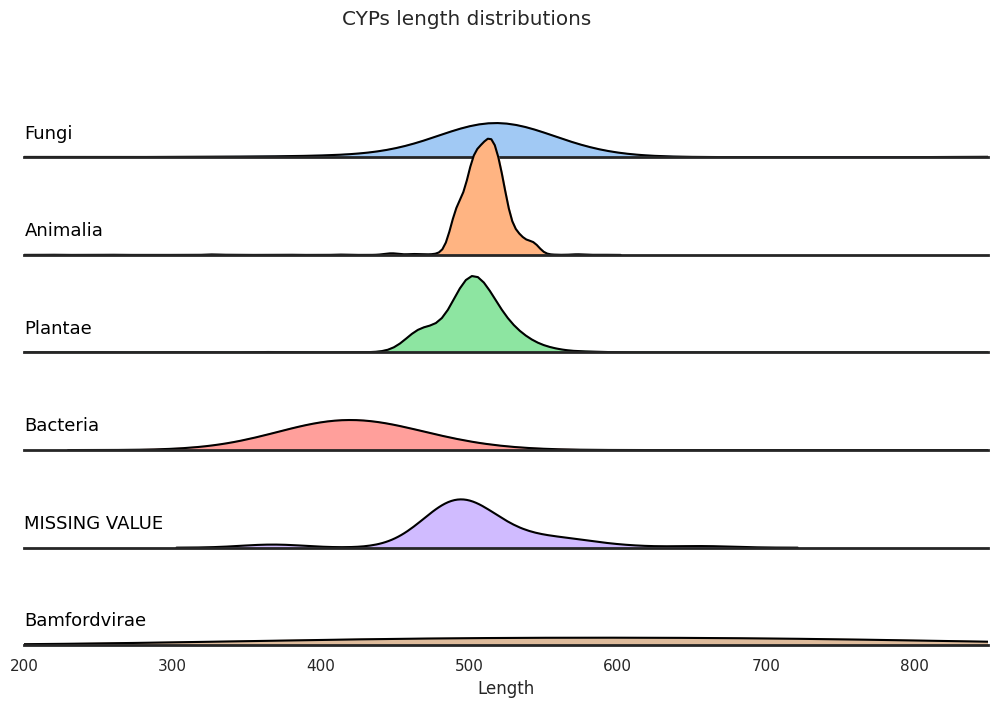

In [91]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("pastel", 12)
g = sns.FacetGrid(df, palette=palette, row="kingdom_name", hue="kingdom_name", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="length", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="length", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "length")
g.fig.subplots_adjust(hspace=-.2)
g.set_titles("")
g.set(yticks=[], xlabel="Length",ylabel=None, xlim=(200,850))
g.despine( left=True)
plt.suptitle('CYPs length distributions', y=0.98)

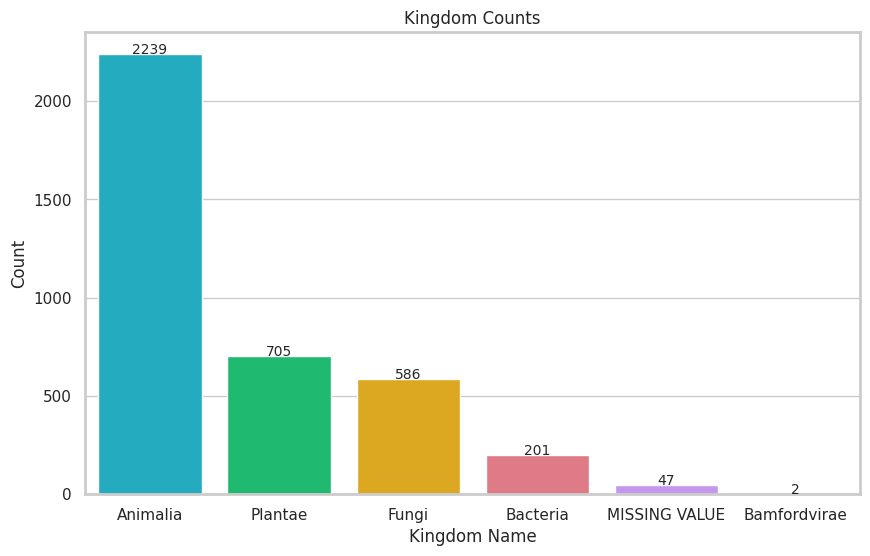

In [92]:
# keep only the 'kingdom_name' column and drop duplicates
kingdoms_df = df[['kingdom_name']]

# count the occurrences of each kingdom_name
kingdoms_counts = kingdoms_df['kingdom_name'].value_counts()
kingdoms_counts

# create the bar plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6)) # set plot size
colors = ['#0ABEDA','#05D470', '#FCB502','#F0697B','#C589FA', '#B77F05' ]
palette = sns.color_palette(colors)
sns.barplot(x=kingdoms_counts.index, y=kingdoms_counts.values, palette=palette, ax=ax)
ax.set_title('Kingdom Counts')
ax.set_xlabel('Kingdom Name')
ax.set_ylabel('Count')

# add actual values to the bars
for i, v in enumerate(kingdoms_counts.values):
    ax.text(i, v + 1, str(v), ha='center', fontsize=10)

plt.show()

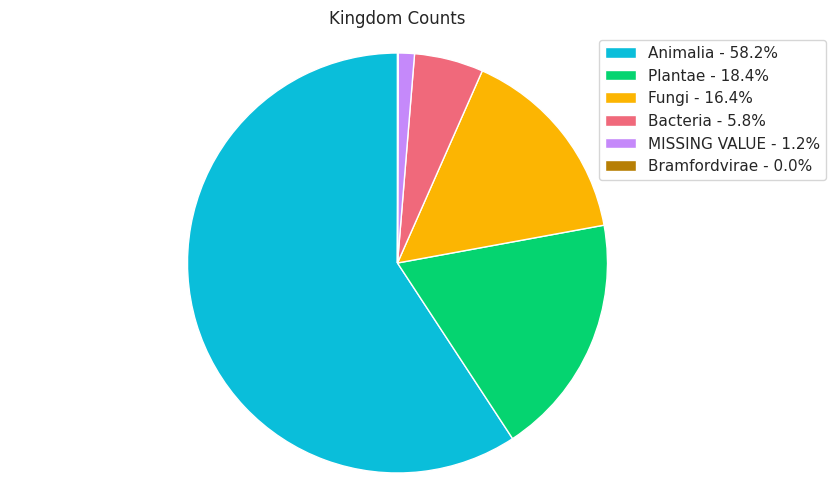

In [93]:
# create the pie chart
plt.figure(figsize=(10,6))
labels = [r'Animalia - 58.2%', r'Plantae - 18.4%', r'Fungi - 16.4%', r'Bacteria - 5.8%', r'MISSING VALUE - 1.2%', r'Bramfordvirae - 0.0%']
colors = ['#0ABEDA','#05D470', '#FCB502','#F0697B','#C589FA', '#B77F05' ]
patches, texts = plt.pie(kingdoms_counts.values,colors=colors, startangle=90)
plt.legend(patches, labels, loc='upper left', bbox_to_anchor=(0.75, 1))
plt.title('Kingdom Counts')
plt.axis('equal')

plt.show()

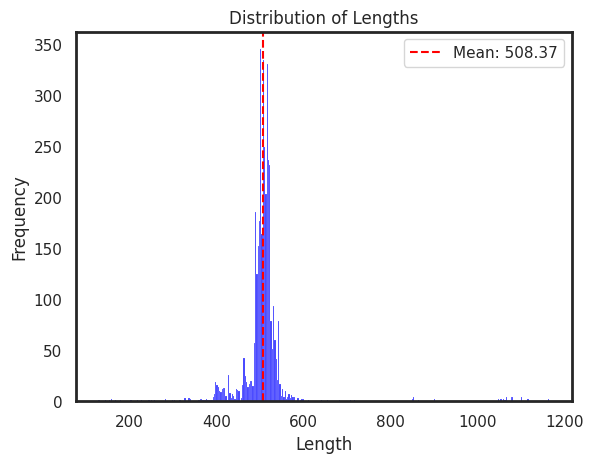

In [94]:
sns.set_style('white')
sns.histplot(data=df, x="length", kde=False, color="blue")

mean_length = df["length"].mean()
plt.axvline(mean_length, color="red", linestyle="--", label=f"Mean: {mean_length:.2f}")
plt.legend()

plt.title("Distribution of Lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")

plt.show()

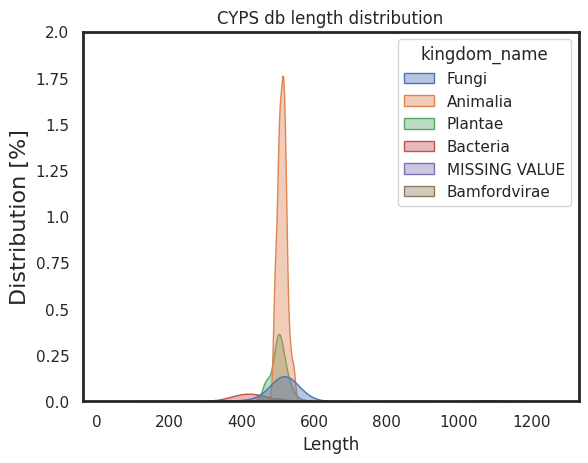

In [95]:
sns.set_style("white")

# plot the density distributions
ax = sns.kdeplot(data=df, x="length", hue="kingdom_name", fill=True, alpha=.4)

# set the plot title and axis labels
plt.title("CYPS db length distribution")
plt.xlabel("Length")
plt.yticks(ax.get_yticks(), (ax.get_yticks() * 1000)/10)
plt.ylabel('Distribution [%]', fontsize=16)

# show the plot
plt.show()

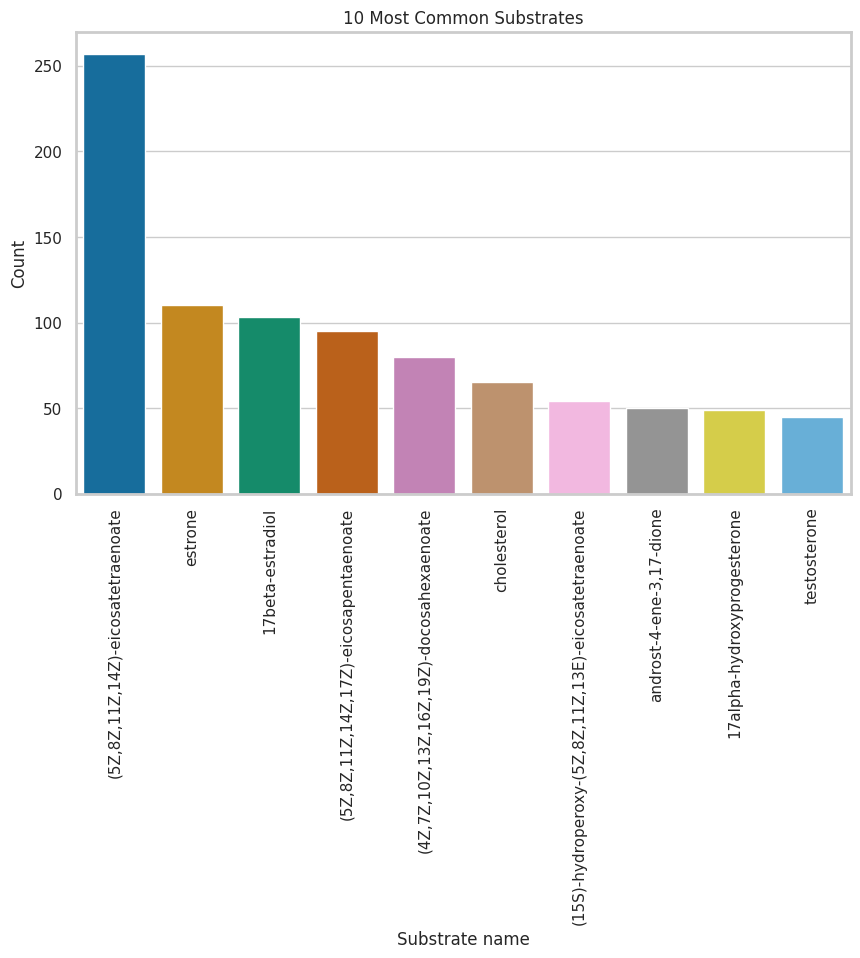

In [96]:
# select only the relevant columns
substrate_df = df[['substrates']]

# rename the columns
substrate_df.columns = ['substrate_name']

# count the occurrences of each product_chebi_id
substrate_counts = pd.DataFrame(substrate_df['substrate_name'].value_counts().sort_values()).reset_index()
substrate_counts.columns = ['substrate_name', 'count']

# select only the top 10 most common products
top_10_substrates = substrate_counts[(substrate_counts['count'] > 1) & (substrate_counts['count'] < 500)].nlargest(11, 'count')
top_10_substrates = top_10_substrates[top_10_substrates.substrate_name != 'an organic molecule']
top_10_substrates
#top_10_substrates.iloc[1:,:]

# create the bar plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6)) # set plot size
sns.barplot(x='substrate_name', y='count', data=top_10_substrates, palette='colorblind', ax=ax)
ax.set_title('10 Most Common Substrates')
ax.set_xlabel('Substrate name')
ax.set_ylabel('Count')

plt.xticks(rotation=90)
plt.show()

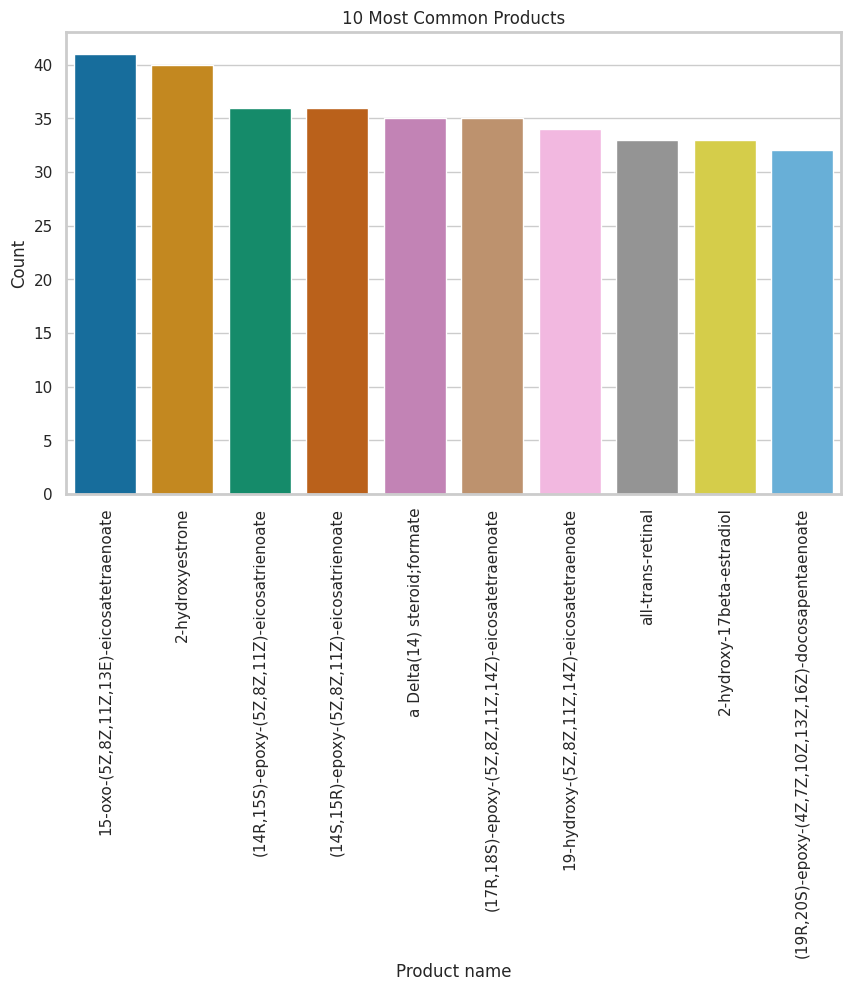

In [97]:
# select only the relevant columns
product_df = df[['products']]

# rename the columns
product_df.columns = ['product_name']

# count the occurrences of each product_chebi_id
product_counts = pd.DataFrame(product_df['product_name'].value_counts().sort_values()).reset_index()
product_counts.columns = ['product_name', 'count']

# select only the top 10 most common products
top_10_products = product_counts[(product_counts['count'] > 1) & (product_counts['count'] < 500)].nlargest(11, 'count')
top_10_products
top_10_products.iloc[1:,:]

# create the bar plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6)) # set plot size
sns.barplot(x='product_name', y='count', data=top_10_products.iloc[1:,:], palette='colorblind', ax=ax)
ax.set_title('10 Most Common Products')
ax.set_xlabel('Product name')
ax.set_ylabel('Count')

plt.xticks(rotation=90)
plt.show()

In [98]:
pfams = pd.read_csv("./pfams.csv", index_col='protein', sep=',')
pfams = pfams.fillna("MISSING VALUE")
merged_df_with_pfams = pd.merge(df, pfams, left_on='protein', right_index=True)
merged_df_with_pfams.head(20)


,protein,name,reaction,rheaID,substrates,Substrate CHEBI ID,Substrate SMILES,reducing_agent,cofactor,products,Product CHEBI ID,Product SMILES,organism_name,kingdom_name,superkingdom_name,sequence,length,additional info,pfam
0,A0A075TMP8,Cytochrome P450 monooxygenase patI,3-hydroxybenzyl alcohol + O2 + reduced [NADPH-...,62212,3-hydroxybenzyl alcohol,17069,OCc1cccc(O)c1,reduced [NADPH--hemoprotein reductase],heme,gentisyl alcohol,5325,C=1(C=C(C(=CC1)O)CO)O,Penicillium expansum,Fungi,Eukaryota,MDILQLAPTHLLAILLSSTSALFLITYLLRAGHRPSDLPNGPPTVP...,526,NaN,PF00067
1,A0A075TRL5,Cytochrome P450 monooxygenase patH,3-methylphenol + O2 + reduced [NADPH--hemoprot...,62208,3-methylphenol,17231,Cc1cccc(O)c1,reduced [NADPH--hemoprotein reductase],heme,3-hydroxybenzyl alcohol,17069,OCc1cccc(O)c1,Penicillium expansum,Fungi,Eukaryota,MEPFLLLLLVLLPAIVLVRYAFTYGHRTSTMPIGPPTLPFIGNIHQ...,524,NaN,PF00067
2,A0A087X1C5,Putative cytochrome P450 2D7,an organic molecule + O2 + reduced [NADPH--hem...,17149,an organic molecule,142491,*[H],reduced [NADPH--hemoprotein reductase],heme,an alcohol,30879,O[*],Homo sapiens,Animalia,Eukaryota,MGLEALVPLAMIVAIFLLLVDLMHRHQRWAARYPPGPLPLPGLGNL...,515,may be involved in the metabolism of codeine t...,PF00067
3,A0A0C5Q4Y6,Ferruginol synthase 1,"abieta-8,11,13-triene + O2 + reduced [NADPH--h...",48080,"abieta-8,11,13-triene",86062,CC(C)c1ccc2c(CC[C@H]3C(C)(C)CCC[C@]23C)c1,reduced [NADPH--hemoprotein reductase],heme,ferruginol,78274,CC(C)c1cc2CC[C@H]3C(C)(C)CCC[C@]3(C)c2cc1O,Rosmarinus officinalis,Plantae,Eukaryota,MDSFPLLAALFFILAATWFISFRRPRNLPPGPFPYPIVGNMLQLGT...,493,NaN,PF00067
4,A0A0C5Q4Y6,Ferruginol synthase 1,ferruginol + O2 + reduced [NADPH--hemoprotein ...,55428,ferruginol,78274,CC(C)c1cc2CC[C@H]3C(C)(C)CCC[C@]3(C)c2cc1O,reduced [NADPH--hemoprotein reductase],heme,11-hydroxyferruginol,138942,C=12[C@]3(C)[C@@]([H])(CCC1C=C(C(=C2O)O)C(C)C)...,Rosmarinus officinalis,Plantae,Eukaryota,MDSFPLLAALFFILAATWFISFRRPRNLPPGPFPYPIVGNMLQLGT...,493,NaN,PF00067
5,A0A0C5Q4Y6,Ferruginol synthase 1,miltiradiene + 2 O2 + 2 reduced [NADPH--hemopr...,66796,miltiradiene,65037,[H][C@@]12CCC3=C(CC=C(C3)C(C)C)[C@@]1(C)CCCC2(C)C,2 reduced [NADPH--hemoprotein reductase],heme,11-oxomiltiradiene,167496,[H][C@@]12CCC3=C(C(=O)C=C(C3)C(C)C)[C@@]1(C)CC...,Rosmarinus officinalis,Plantae,Eukaryota,MDSFPLLAALFFILAATWFISFRRPRNLPPGPFPYPIVGNMLQLGT...,493,NaN,PF00067
6,A0A0C5QRZ2,Ferruginol synthase,"abieta-8,11,13-triene + O2 + reduced [NADPH--h...",48080,"abieta-8,11,13-triene",86062,CC(C)c1ccc2c(CC[C@H]3C(C)(C)CCC[C@]23C)c1,reduced [NADPH--hemoprotein reductase],heme,ferruginol,78274,CC(C)c1cc2CC[C@H]3C(C)(C)CCC[C@]3(C)c2cc1O,Salvia fruticosa,Plantae,Eukaryota,MDPFPLVAAALFIAATWFITFKRRRNLPPGPFPYPIVGNMLQLGSQ...,492,NaN,PF00067
7,A0A0C5QRZ2,Ferruginol synthase,ferruginol + O2 + reduced [NADPH--hemoprotein ...,55428,ferruginol,78274,CC(C)c1cc2CC[C@H]3C(C)(C)CCC[C@]3(C)c2cc1O,reduced [NADPH--hemoprotein reductase],heme,11-hydroxyferruginol,138942,C=12[C@]3(C)[C@@]([H])(CCC1C=C(C(=C2O)O)C(C)C)...,Salvia fruticosa,Plantae,Eukaryota,MDPFPLVAAALFIAATWFITFKRRRNLPPGPFPYPIVGNMLQLGSQ...,492,NaN,PF00067
8,A0A0C5QRZ2,Ferruginol synthase,miltiradiene + 2 O2 + 2 reduced [NADPH--hemopr...,66796,miltiradiene,65037,[H][C@@]12CCC3=C(CC=C(C3)C(C)C)[C@@]1(C)CCCC2(C)C,2 reduced [NADPH--hemoprotein reductase],heme,11-oxomiltiradiene,167496,[H][C@@]12CCC3=C(C(=O)C=C(C3)C(C)C)[C@@]1(C)CC...,Salvia fruticosa,Plantae,Eukaryota,MDPFPLVAAALFIAATWFITFKRRRNLPPGPFPYPIVGNMLQLGSQ...,492,NaN,PF00067
9,A0A1D6HSP4,Dimethylnonatriene synthase,"(6E,10E)-geranyllinalool + O2 + reduced [NADPH...",13545,"(6E,10E)-geranyllinalool",74299,CC(C)=CCC\C(C)=C\CC\C(C)=C\CCC(C)(O)C=C,reduced [NADPH--hemoprotein reductase],heme,"(3E,7E)-4,8,12-trimethyltrideca 1,3,7,11-tetra...",74322;48058,CC(C)=CCC\C(C)=C\CC\C(C)=C\C=C;CC(=O)C=C,Zea mays,Plantae,Eukaryota,MELASTMSVAMALAAAIFVVLCSVVASARGRREKALKLPPGPRGWP...,531,NaN,PF00067


In [99]:

pfamsCount = pd.DataFrame(merged_df_with_pfams['pfam'].value_counts().reset_index())
pfamsCount.columns = ['Pfam', 'Count']
print(pfamsCount)



      Pfam  Count
0  PF00067   3780
1  PF00258     17
2  PF00667     17
3  PF00175     17
4  PF03098     10
5  PF00753      7
6  PF00248      2


Text(0.5, 1.0, 'CYPS db pfams')

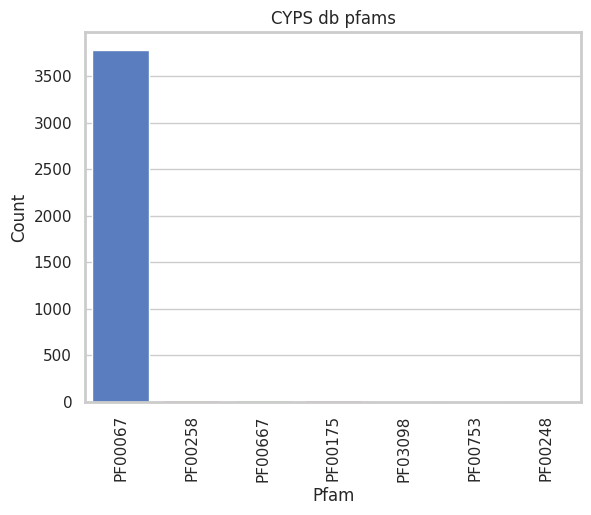

In [100]:
# Bar plot
sns.barplot(x='Pfam', y='Count', data=pfamsCount, palette='muted')
plt.xticks(rotation=90)
plt.title('CYPS db pfams')


(-0.5, 6.5, 0.0, 3969.0)

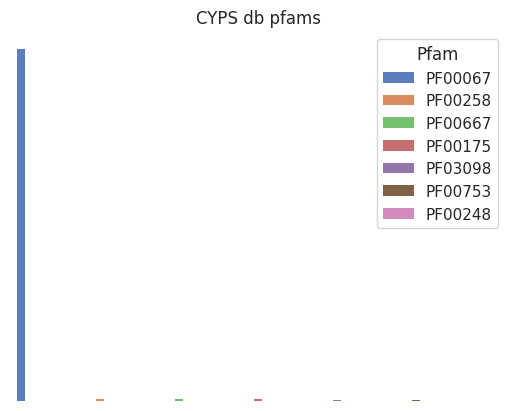

In [101]:
# Polar plot
sns.barplot(x='Pfam', y='Count', hue='Pfam', data=pfamsCount, palette='muted', edgecolor='none')
plt.title('CYPS db pfams')
plt.axis('off')

In [102]:
merged_df_with_pfams.columns

Index(['protein', 'name', 'reaction', 'rheaID', 'substrates',
       'Substrate CHEBI ID', 'Substrate SMILES', 'reducing_agent', 'cofactor',
       'products', 'Product CHEBI ID', 'Product SMILES', 'organism_name',
       'kingdom_name', 'superkingdom_name', 'sequence', 'length',
       'additional info', 'pfam'],
      dtype='object')

In [103]:
# group the data by pfam and length
grouped = merged_df_with_pfams.groupby(['pfam', 'length', 'protein']).size().reset_index(name='counts')

# print the resulting dataframe
print(grouped)


         pfam  length protein  counts
0     PF00067     129  Q0CJ54       1
1     PF00067     146  Q6ZSU1       1
2     PF00067     155  P85191       1
3     PF00067     159  G3XSI3       2
4     PF00067     170  P9WEY9       1
...       ...     ...     ...     ...
1758  PF03098    1079  B0Y6R2       2
1759  PF03098    1079  Q4WPX2       2
1760  PF03098    1081  G5EB19       2
1761  PF03098    1081  Q6RET3       2
1762  PF03098    1165  Q9UUS2       2

[1763 rows x 4 columns]


/root/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/root/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


Text(0.5, 0.98, 'CYPs PFAM-length distributions')

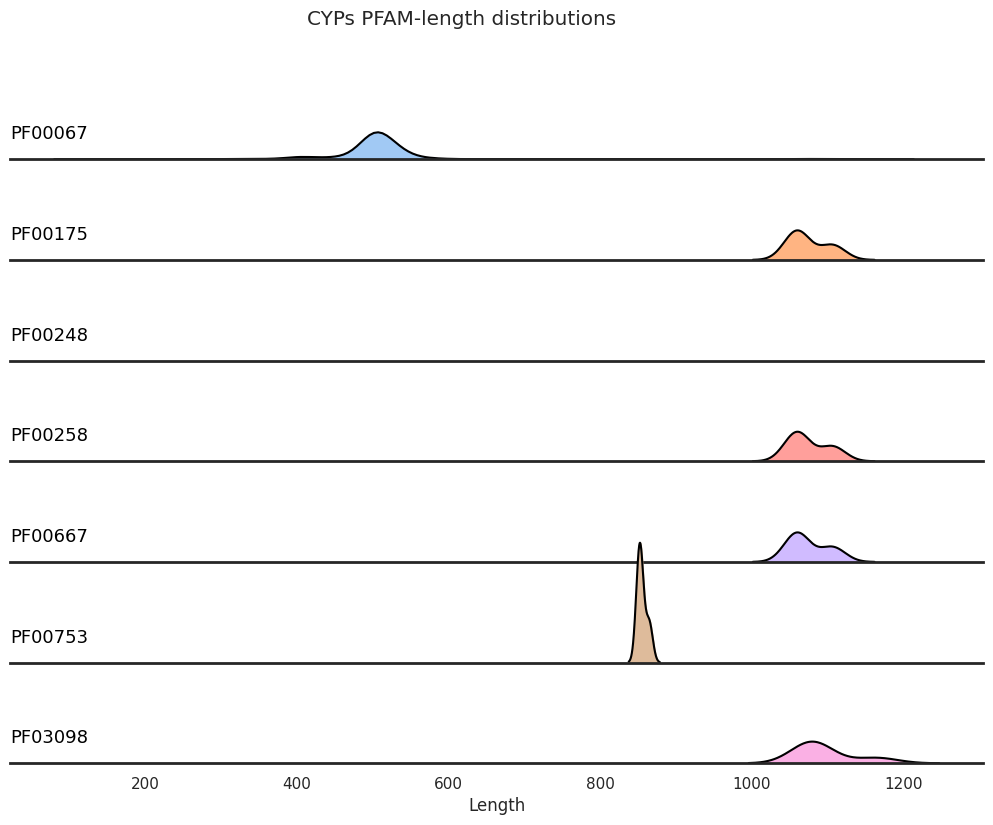

In [104]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("pastel", 12)
g = sns.FacetGrid(grouped, palette=palette, row="pfam", hue="pfam", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="length", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="length", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "length")
g.fig.subplots_adjust(hspace=-.2)
g.set_titles("")
g.set(yticks=[], xlabel="Length",ylabel=None)
g.despine( left=True)
plt.suptitle('CYPs PFAM-length distributions', y=0.98)

In [105]:
pf00753 = grouped[grouped.pfam == 'PF00753']
pf00753

,pfam,length,protein,counts
1754,PF00753,852,W6QRN8,2
1755,PF00753,853,A0A0B5KYT4,2
1756,PF00753,853,I7LRH3,2
1757,PF00753,865,A0A097ZPE4,1


In [106]:
pf00067 = grouped[grouped.pfam == 'PF00067']
pf00067
# is in all CYPs because I searched 

,pfam,length,protein,counts
0,PF00067,129,Q0CJ54,1
1,PF00067,146,Q6ZSU1,1
2,PF00067,155,P85191,1
3,PF00067,159,G3XSI3,2
4,PF00067,170,P9WEY9,1
...,...,...,...,...
1721,PF00067,1081,Q6RET3,2
1722,PF00067,1103,A0A3G9HRC2,2
1723,PF00067,1103,Q2UNA2,2
1724,PF00067,1115,Q9HGE0,2


In [107]:
pf00175 = grouped[grouped.pfam == 'PF00175']
pf00175

,pfam,length,protein,counts
1726,PF00175,1049,P14779,2
1727,PF00175,1054,O08336,2
1728,PF00175,1061,O08394,2
1729,PF00175,1064,A0A455R5H4,1
1730,PF00175,1065,Q81BF4,2
1731,PF00175,1066,Q9Y8G7,2
1732,PF00175,1103,A0A3G9HRC2,2
1733,PF00175,1103,Q2UNA2,2
1734,PF00175,1115,Q9HGE0,2


In [108]:
pf00248 = grouped[grouped.pfam == 'PF00248']
pf00248

,pfam,length,protein,counts
1735,PF00248,901,P0DKI7,2


In [109]:
pf00258 = grouped[grouped.pfam == 'PF00258']
pf00258

,pfam,length,protein,counts
1736,PF00258,1049,P14779,2
1737,PF00258,1054,O08336,2
1738,PF00258,1061,O08394,2
1739,PF00258,1064,A0A455R5H4,1
1740,PF00258,1065,Q81BF4,2
1741,PF00258,1066,Q9Y8G7,2
1742,PF00258,1103,A0A3G9HRC2,2
1743,PF00258,1103,Q2UNA2,2
1744,PF00258,1115,Q9HGE0,2


In [110]:
pf00667 = grouped[grouped.pfam == 'PF00667']
pf00667

,pfam,length,protein,counts
1745,PF00667,1049,P14779,2
1746,PF00667,1054,O08336,2
1747,PF00667,1061,O08394,2
1748,PF00667,1064,A0A455R5H4,1
1749,PF00667,1065,Q81BF4,2
1750,PF00667,1066,Q9Y8G7,2
1751,PF00667,1103,A0A3G9HRC2,2
1752,PF00667,1103,Q2UNA2,2
1753,PF00667,1115,Q9HGE0,2
